# simple `autograd` example

In [1]:
import torch

In [2]:
y = torch.tensor([1., 2., 3.])
# y.requires_grad_(True)
print(y)

tensor([1., 2., 3.])


In [3]:
y = torch.tensor([1., 2., 3.], requires_grad=True) # 
print(y)

tensor([1., 2., 3.], requires_grad=True)


In [4]:
v = 2*y
print(v)

tensor([2., 4., 6.], grad_fn=<MulBackward0>)


In [5]:
z = v.mean()
print(z)

tensor(4., grad_fn=<MeanBackward0>)


In [6]:
z.backward()

In [7]:
print(y.grad)

tensor([0.6667, 0.6667, 0.6667])


In [8]:
2/3

0.6666666666666666

# prevent gradient computations

In [9]:
y = torch.tensor([1., 2., 3.], requires_grad=False)
print(y)

x = torch.tensor([1., 2., 3.])
x.requires_grad_(False)
print(x)

u = torch.tensor([1., 2., 3.])
u.requires_grad_(True)
print(u)

with torch.no_grad():
    z = 2*u
    print(z)

tensor([1., 2., 3.])
tensor([1., 2., 3.])
tensor([1., 2., 3.], requires_grad=True)
tensor([2., 4., 6.])


In [10]:
v = torch.tensor([1., 2., 3.], requires_grad=True)
w = v.detach() # return a copy with requires_grad = False
print(w)

tensor([1., 2., 3.])


# By default, PyTorch accumulates the gradients

In [11]:
y = torch.tensor([1., 2., 3.], requires_grad=True)

for i in range(5):
    
    model_output = y.mean()
    
    model_output.backward()
    
    print(y.grad)
    
    y.grad.zero_()
#     y.grad.data = torch.tensor([0., 0., 0.])

tensor([0.3333, 0.3333, 0.3333])
tensor([0.3333, 0.3333, 0.3333])
tensor([0.3333, 0.3333, 0.3333])
tensor([0.3333, 0.3333, 0.3333])
tensor([0.3333, 0.3333, 0.3333])


In [12]:
1/3

0.3333333333333333

# Linear Regression from Scratch

## generate data

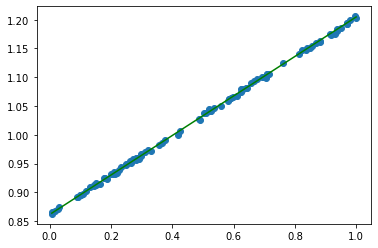

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Training data ==> (Xs, ys)
N_data = 100
Xs = np.random.rand(N_data, 1) # uniform distribution over [0, 1]
# print(Xs)

a = np.random.rand(1)
b = np.random.rand(1)
ys = Xs*a + b + np.random.randn(N_data, 1)*0.002 # y = ax + b

plt.scatter(Xs, ys)

# Underlying (clean) data
X_ = np.linspace(Xs.min(), Xs.max())
y_ = X_*a + b
plt.plot(X_, y_, color='g')

In [14]:
import torch

x = torch.from_numpy(Xs).float()  # numpy array to PyTorch tensor
y = torch.from_numpy(ys).float()

# initialization
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)

In [15]:
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    
    # forward pass
    y_pred = x*w1 + w2
    
    # compute loss 
    loss = (y_pred - y).pow(2).mean() # mean squared error
    
    loss.backward()
    
    if epoch % 100 == 0:
        print(f"epoch={epoch} - loss={loss.data}")
    
    # update parameters
    w1.data = w1.data - learning_rate*w1.grad.data
    w2.data = w2.data - learning_rate*w2.grad.data
    
    w1.grad.data.zero_()
    w2.grad.data.zero_()

epoch=0 - loss=0.3106815218925476
epoch=100 - loss=0.010054857470095158
epoch=200 - loss=0.006209827493876219
epoch=300 - loss=0.004675295669585466
epoch=400 - loss=0.00352652370929718
epoch=500 - loss=0.0026603322476148605
epoch=600 - loss=0.0020071708131581545
epoch=700 - loss=0.0015146444784477353
epoch=800 - loss=0.0011432536412030458
epoch=900 - loss=0.0008632022654637694


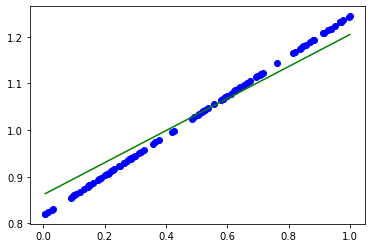

In [16]:
# y_hat = X_*w1.detach().numpy() + w2.detach().numpy()
y_hat = Xs*w1.detach().numpy() + w2.detach().numpy()


plt.plot(X_, y_, color='g')
plt.scatter(Xs, y_hat, color = 'b')